In [1]:
%pylab inline
import sys
sys.path.append('..\..')
from genx import api

Populating the interactive namespace from numpy and matplotlib
'Plugin' object has no attribute 'data'


In [2]:
model,optimizer=api.load('SuperAdam_SiO_full_res_calc.hgx')

## Initialize reflecivity from loaded model

In [3]:
refl=api.Reflectivity(model, optimizer)

## Create a new model from scratch

In [4]:
refl.new_model()
refl.add_stack('ML', Repetitions=2)
refl.add_layer('SiO', d=15., f='fp.O+fp.Si', b='bc.Si+bc.O*2')
refl.add_layer('Fe', d=150., f='fp.Fe', b='bc.Fe')
refl

Reflectivity Model:
    Instruments:
        inst = Instrument(probe='x-ray', wavelength=1.54, coords='2θ', I0=1.0, res=0.001, restype='no conv', respoints=5, resintrange=2, beamw=0.01, footype='no corr', samplelen=10.0, incangle=0.5, pol='uu', Ibkg=0.0, tthoff=0.0,)
    Sample Structure:
        Amb = model.Layer(sigma=0.0, dens=1.0, d=0.0, f=(1e-20+1e-20j), b=0j, xs_ai=0.0, magn=0.0, magn_ang=0.0)
        ML = model.Stack: Repetitions = 1
        SiO = model.Layer(sigma=0.0, dens=1.0, d=15.0, f=fp.O+fp.Si, b=bc.Si+bc.O*2, xs_ai=0.0, magn=0.0, magn_ang=0.0)
        Fe = model.Layer(sigma=0.0, dens=1.0, d=150.0, f=fp.Fe, b=bc.Fe, xs_ai=0.0, magn=0.0, magn_ang=0.0)
        Sub = model.Layer(sigma=0.0, dens=1.0, d=0.0, f=(1e-20+1e-20j), b=0j, xs_ai=0.0, magn=0.0, magn_ang=0.0)
    User Parameters:
    Simulations:
        SiO ref: Specular(d.x, inst)

## Make some model modifications

In [5]:
refl.move_up('Fe')
refl['Sub']=refl.Layer(sigma=5.3, f='fp.Si', b='bc.Si')
refl['ML'].Repetitions=2
refl['inst']=refl.Instrument(probe='neutron', wavelength=4.5, coords='q', I0=10.0)
refl

Reflectivity Model:
    Instruments:
        inst = Instrument(probe='neutron', wavelength=4.5, coords='q', I0=10.0, res=0.001, restype='no conv', respoints=5, resintrange=2, beamw=0.01, footype='no corr', samplelen=10.0, incangle=0.5, pol='uu', Ibkg=0.0, tthoff=0.0,)
    Sample Structure:
        Amb = model.Layer(sigma=0.0, dens=1.0, d=0.0, f=(1e-20+1e-20j), b=0j, xs_ai=0.0, magn=0.0, magn_ang=0.0)
        ML = model.Stack: Repetitions = 2
        Fe = model.Layer(sigma=0.0, dens=1.0, d=150.0, f=fp.Fe, b=bc.Fe, xs_ai=0.0, magn=0.0, magn_ang=0.0)
        SiO = model.Layer(sigma=0.0, dens=1.0, d=15.0, f=fp.O+fp.Si, b=bc.Si+bc.O*2, xs_ai=0.0, magn=0.0, magn_ang=0.0)
        Sub = model.Layer(sigma=5.3, dens=1.0, d=0.0, f=fp.Si, b=bc.Si, xs_ai=0.0, magn=0.0, magn_ang=0.0)
    User Parameters:
    Simulations:
        SiO ref: Specular(d.x, inst)

## Show resulting script

In [6]:
from IPython.display import Code
Code(model.script, language='python')

from numpy import *
import models.spec_nx as model
from models.utils import UserVars, fp, fw, bc, bw

# BEGIN Instrument DO NOT CHANGE
from models.utils import create_fp, create_fw
inst = model.Instrument(probe='neutron', wavelength=4.5, coords='q', I0=10.0, res=0.001, restype='no conv', respoints=5, resintrange=2, beamw=0.01, footype='no corr', samplelen=10.0, incangle=0.5, pol='uu', Ibkg=0.0, tthoff=0.0,)
inst_fp = create_fp(inst.wavelength); inst_fw = create_fw(inst.wavelength)

fp.set_wavelength(inst.wavelength); fw.set_wavelength(inst.wavelength)
# END Instrument

# BEGIN Sample DO NOT CHANGE
Amb = model.Layer(sigma=0.0, dens=1.0, d=0.0, f=(1e-20+1e-20j), b=0j, xs_ai=0.0, magn=0.0, magn_ang=0.0)
Fe = model.Layer(sigma=0.0, dens=1.0, d=150.0, f=fp.Fe, b=bc.Fe, xs_ai=0.0, magn=0.0, magn_ang=0.0)
SiO = model.Layer(sigma=0.0, dens=1.0, d=15.0, f=fp.O+fp.Si, b=bc.Si+bc.O*2, xs_ai=0.0, magn=0.0, magn_ang=0.0)
Sub = model.Layer(sigma=5.3, dens=1.0, d=0.0, f=fp.Si, b=bc.Si, xs_ai=0.0, magn=0.0, magn_ang=0.0)

ML = model.Stack(Layers=[SiO , Fe], Repetitions = 2)

sample = model.Sample(Stacks = [ML], Ambient = Amb, Substrate = Sub)
# END Sample

# BEGIN Parameters DO NOT CHANGE
cp = UserVars()
# END Parameters

SLD = []
def Sim(data):
    I = []
    SLD[:] = []
    # BEGIN Dataset 0 DO NOT CHANGE
    d = data[0]
    I.append(sample.SimSpecular(d.x, inst))
    if _sim: SLD.append(sample.SimSLD(None, None, inst))
    # END Dataset 0
    return I

# Start from scratch

In [7]:
model, optimizer, refl=api.Reflectivity.create_new()

refl['inst']=refl.Instrument(probe='neutron', wavelength=4.5, coords='q', 
                             res=0.0003, restype='full conv and varying res.', respoints=5, resintrange=2)
refl.add_stack('ML')
refl.add_layer('SiO', f='fp.Si*1+fp.O*1', b='bc.Si*1+bc.O*1', dens=0.0341508, d=1350, sigma=5.0)
refl['Sub']=refl.Layer(f='fp.Si', b='bc.Si', dens=0.0499598, sigma=5.0)

api.data_loader.d17_legacy.LoadData(model.data[0], 'D17_SiO.out')
model.data[0].y_command='maximum(y, 1e-8)' # filter negative and 0 values
model.data[0].run_command()
model.parameters.append('SiO.setDens', model).fit=True
model.parameters.append('SiO.setD', model).fit=True
model.parameters.append('SiO.setSigma', model).fit=True
model.parameters.append('Sub.setSigma', model).fit=True

Genx Model - compiled
File: 
Parameters:
           Parameter        Value            Fit              Min              Max              Error           
                            0.0              False            0.0              0.0              None            
           SiO.setDens      0.0341508        True             0.0085377        0.1366032        None            
           SiO.setD         1350.0           True             337.5            5400.0           None            
           SiO.setSigma     5.0              True             1.25             20.0             None            
           Sub.setSigma     5.0              True             1.25             20.0             None            
DataList([
           DataSet(name=Data 0         , show=True, use=True, error=False),
           ])
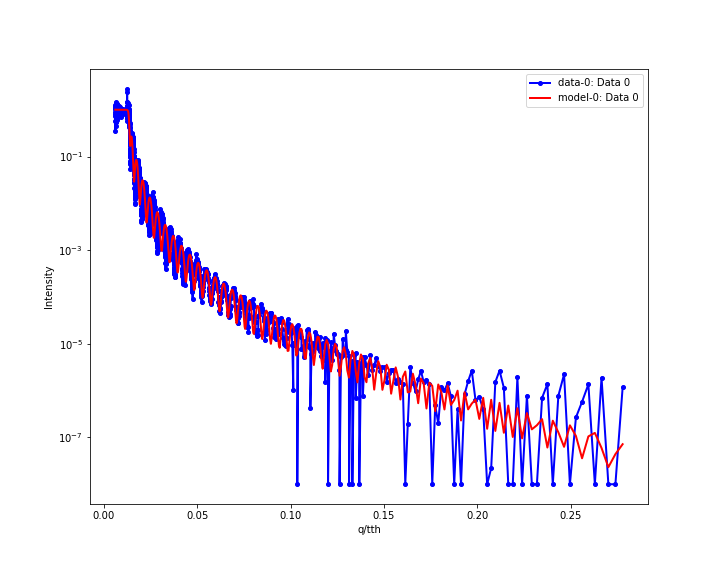

In [8]:
model

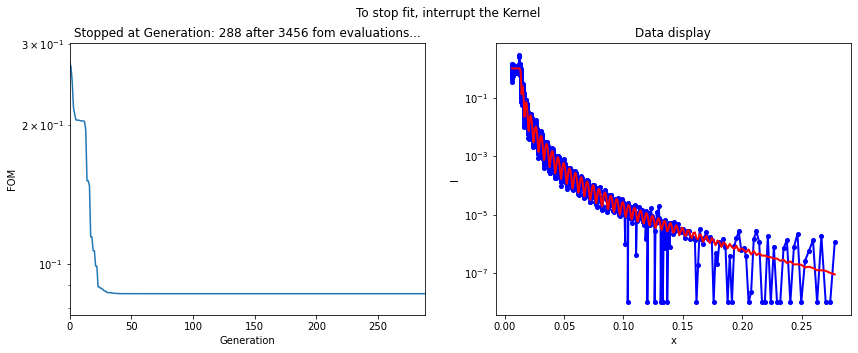

Stopped at Generation: 288 after 3456 fom evaluations...
If you want to update the model with the fit results, call api.fit_update(model, optimizer)


In [9]:
api.fit_notebook(model, optimizer)

In [10]:
api.fit_update(model, optimizer)

Genx Model - not compiled yet
File: 
Parameters:
           Parameter        Value            Fit              Min              Max              Error           
                            0.0              False            0.0              0.0              None            
           SiO.setDens      0.03449461000496952 True             0.0085377        0.1366032        None            
           SiO.setD         1243.8332809973945 True             337.5            5400.0           None            
           SiO.setSigma     3.921281108658084 True             1.25             20.0             None            
           Sub.setSigma     9.19698024913498 True             1.25             20.0             None            
DataList([
           DataSet(name=Data 0         , show=True, use=True, error=False),
           DataSet(name=Data 1         , show=True, use=True, error=False),
           ])
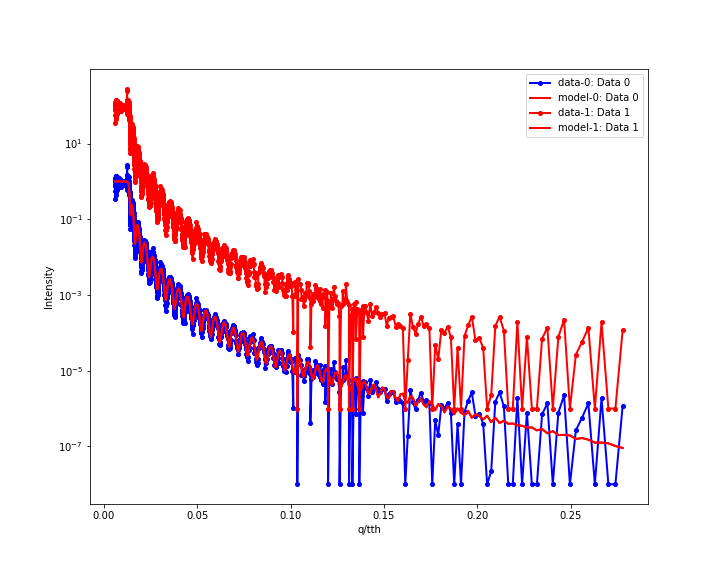

In [11]:
refl.add_data()
api.data_loader.d17_legacy.LoadData(model.data[1], 'D17_SiO.out')
model.data[1].y_command='100*maximum(y, 1e-8)'
model.data[1].run_command()
model.data[1].data_color=(1.0, 0, 0)
model